# Introduction to Scikit-Learn (sklearn)

This notebook demonstates some of the most useful functions of the Sklearn Lib

Cover:

0. End-to_end Scikit-Learn Workflow
1. Getting Data Ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluation a model
5. Improve a model
6. Save and load a trained model
7. Put it all together!

## 0. An end-to-end scikit-learn workflow

In [1]:
# 1. Get the data ready

# Standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1. Getting Data Ready: 

Three main thins we have to do:
1. Split the data into features and labels (Usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (a.k.a. feature encoding)

In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis = 1) # Remove 'target' column

# Create y (lables)
y = heart_disease["target"]

In [4]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [6]:
# 2. Chose the right model and hyper-parameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() #clf = classifer

# We'll keep the default hyper-parametters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# import warnings
# # warnings.filterwarnings("ignore") # to ignore the warning
# # warnings.filterwarnings("default") 

In [8]:
# 3. Fit the model to the training data

clf.fit(X_train, y_train);

In [9]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [10]:
# 4. Evaludate the model on the training data and test data
clf.score(X_test, y_test)

0.7868852459016393

In [11]:
clf.score(X_train, y_train)

1.0

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[20,  8],
       [ 5, 28]])

In [14]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [15]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10,100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train);
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:2f}")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.688525

Trying model with 20 estimators...
Model accuracy on test set: 77.049180

Trying model with 30 estimators...
Model accuracy on test set: 78.688525

Trying model with 40 estimators...
Model accuracy on test set: 81.967213

Trying model with 50 estimators...
Model accuracy on test set: 80.327869

Trying model with 60 estimators...
Model accuracy on test set: 78.688525

Trying model with 70 estimators...
Model accuracy on test set: 81.967213

Trying model with 80 estimators...
Model accuracy on test set: 81.967213

Trying model with 90 estimators...
Model accuracy on test set: 85.245902



In [16]:
# 6. Save a model and load it

import pickle
# pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

In [18]:
loaded_model.score(X_test, y_test)

0.9016393442622951

## 2. Choosing the right estimator/algorithm for our problems
Scikit-learn uses estimator as another term for machine learning model or algorithm
* Classification - predicting wheter a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-Learn Machine Learning Map


### 2.1 Picking a machine learning model for a regression problem

In [19]:
# Import Boston Housing dataset
from sklearn.datasets import load_boston
#Google: "sklearn boston dataset" to understand more about boston data
boston = load_boston()

In [20]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
#Click on User Guid to understand more about the dataset:
#https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
# How many samples ?
len(boston_df)

506

In [22]:
# Let's try the Ridge Regression Model
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42) #to make sure result is reproducible

#create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate Ridge Model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test) #Return R^2 of the regression

0.6662221670168519

How do we improve this score ?

What if Ridge was not working ?

In [23]:
# Let 's try the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# instantiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

#Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

### 2.2 Picking a machine learning model for a Classification problem

Let's check the map

In [24]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
len(heart_disease)

303

In [26]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Consulting the map and it says to try `LinearSVC`

Tidbit:
1. If you have structured data, used ensemble methods (tables)
2. If you have unstructured data, use deep learning or transfer learning (image, audio, text, video)

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [27]:
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate Random Forest Classifier (use the parterns the model has learnt)
clf.score(X_test, y_test)


0.8524590163934426

### 3.2 Make predictions using ML model
#### 3.2.1 Predict for Classification Models

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`


In [28]:
# Use a trained model to make predictions
y_preds = clf.predict(X_test)

In [29]:
#Three way to measure the Accuracy
## Method 1:
np.mean(y_preds == y_test)

0.8524590163934426

In [30]:
## Method 2:
clf.score(X_test, y_test)

0.8524590163934426

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426


**Note**: For the `predict()` function to work, it must be passed X (data) in the same format the model was trained on. Anything different and it will return an error.

`predict_proba()` returns the probabilities of a classification label.

In [32]:
# Return probabilities rather than labels
clf.predict_proba(X_test[:5]) #[x% prob class = 0, y% prob class = 1]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

This output `[0.89, 0.11]` means the model is predicting label 0 (index 0) with a probability score of 0.89.

Because the score is over 0.5, when using predict(), a label of 0 is assigned.

In [33]:
#Return labels
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

#### 3.2.2 Predict for Regression Models
`predict()` can also be used for regression models

In [34]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [36]:
y_preds = model.predict(X_test)

In [37]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [38]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [39]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) #On average, the prediction value is ~ 2.13 away from the target

2.136382352941176

## 4. Evaluating a Machine Learning Model
* Google 'scikit learn evaluate a model'
* 3 ways to evaluate Scikit Learn Models
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function

### 4.1 Evaluating a model with `Score` Method

In [40]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]


#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
clf.score(X_test, y_test) #Every ML model has built-in score function

0.8524590163934426

In [42]:
clf.score(X_train,y_train)

1.0

### 4.2 Evaluating a model using the `scoring` parameter
* Model-evaluation tools using cross-validation (Prefer 5-fold picture from Github)

#### Cross-val score for Classification Model

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
clf.score(X_test, y_test)

0.8524590163934426

In [45]:
cross_val_score(clf, X, y, cv = 10) #by default = 5-fold => split X,y into 5 different dataset and train 5 different models

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [46]:
np.random.seed(42)

#Single training and test split score (#Default Scoring parameter of classifier)
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X,y))

#Campare the two score
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [47]:
# Scoring parameter set to None by default, 
# cross_val_score uses the same metric as score() for whatever model is passed to cross_val_score()
# in this case, clf's score() = mean accuracy 
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y, scoring=None)

In [48]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [49]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [50]:

cv_precision = cross_val_score(clf, X,y, scoring="precision")
print(f'The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%')

The cross-validated precision is: 80.86%


In [51]:
# Recall 

cv_recall = cross_val_score(clf, X,y, scoring="recall")
print(f'The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%')

The cross-validated recall is: 84.24%


In [52]:

cv_f1 = cross_val_score(clf, X,y, scoring="f1")
print(f'The cross-validated f1 is: {np.mean(cv_f1)*100:.2f}%')

The cross-validated f1 is: 84.15%


#### Cross-val score for Regression Model

In [53]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [54]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None) #default score function= R^2
np.mean(cv_r2)

0.6243870737930857

In [55]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2") 
np.mean(cv_r2)

0.6243870737930857

In [56]:
# Mean Absolute Error

cv_mae = cross_val_score(model, X,y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.003222869345758

In [57]:
# Mean Squared Error
cv_mse = cross_val_score(model, X,y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X,y, cv=5)

In [59]:
np.mean(cross_val_score)

0.8248087431693989

In [60]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (TPR) vs a model's false positive (FPR).
* True Positive = Model predicts 1 when truth is 1
* False Positive = Model predicts 1 when truth is 0
* True Negative = Model predicts 0 when truth is 0
* False Negative = Model predicts 0 when truth is 1

In [61]:
# Create X_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [62]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)
# Make Predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:5], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57]]),
 61)

In [63]:
y_probs_positive = y_probs[:, 1] #Take the second column of y_probs
y_probs_positive[:5]

array([0.49, 0.83, 0.49, 0.28, 0.57])

In [64]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

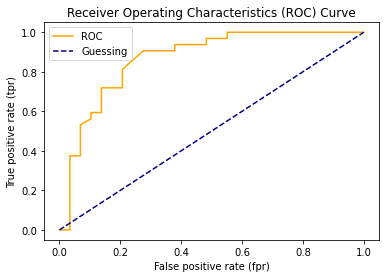

In [65]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    #Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC") # x = fpr, y = tpr
    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing") # x = [0,1], y=[0,1]
    
    #Customize the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

* Model is doing far way more better than guessing

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive) #Area under ROC curve, max is 1.0

0.8669181034482759

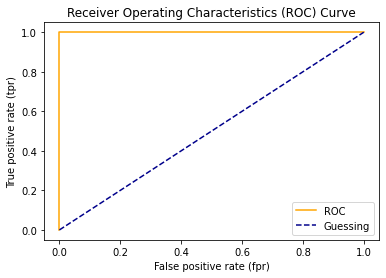

In [67]:
#Plot perfect ROC curve and ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [68]:
#Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [69]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [70]:
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [71]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [72]:
# How to install a conda package into the current env from Jupyter's Notebook

# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

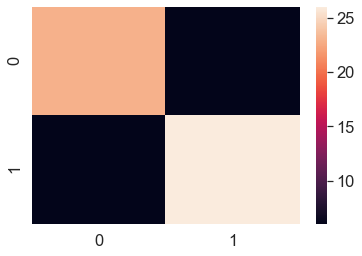

In [73]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);


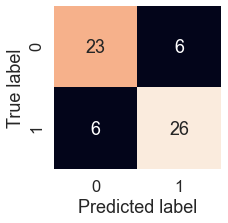

In [74]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, 
                     annot=True, #Annotate the boxes with conf_mat info
                     cbar=False) 
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
  
    
plot_conf_mat(conf_mat)

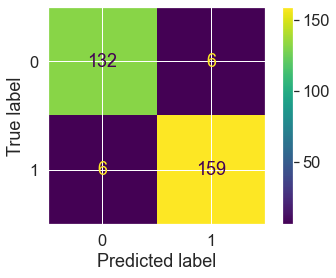

In [75]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

**Classification Report**

* **Precision**: proportion of positive identifications (model predicted class 1) are actually correct => No false postives, Precision = 1.0
* **Recall**: proportion of actual positives are correctly classified => No false negatives, Recall = 1.0
* **F1 Score**: a combination of precision and recall => Perfect model F1 score = 1.0
* **Support**: the number of samples each metric was calculated on. (for Ex below: class 0 has 29 samples, class 1 has 32 samples)
* **Accuracy**: The accuracy of the model in decimal form. Perfect accuracy = 1

</br>

* **Marco Avg**: the average precision, recall and F1 score of each class (0 & 1) => Drawback: does not reflect class imbalance (i.e: maybe 0 samples maybe more outweight 1 samples)
* **Weighted Avg**: same as Marco Avg, except: each metric is calculated w.r.t how many samples there are in each class. This metric will favour majority class (i.e: the class which has more samples)


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [77]:
#Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] =1 #Only 1 positive case

disease_preds = np.zeros(10000)#Model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/Users/quannguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quannguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quannguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


* Precision: 99% for class 0, but 0% for class 1

Ask yourself, although the model achieves 99.99% accuracy, is it useful?

To summarize:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* **Precision and recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2. Regression Model Evaluation Metrics

Model evaluation metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

1. R^2 (r-squared) or coefficient of determination. => Maximize
2. Mean Absolute Error (MAE) => Minimize
3. Mean Squared Error (MSE)  => Minimize

#### R^2
What R-squared does: Compares your model predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predicting the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it 's R^2 value would be 1.

In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [79]:
model.score(X_test, y_test)

0.8654448653350507

In [80]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [81]:
y_test.mean()

21.488235294117654

In [82]:
y_test_mean[:5]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [83]:
r2_score(y_test, y_test_mean)#R^2 score ~= 0 as y_test almost same y_test_mean

2.220446049250313e-16

In [84]:
r2_score(y_test, y_test) #R^2 score = 1, perfect prediction

1.0

In [85]:
y_preds = model.predict(X_test)
r2_score(y_test, y_preds) #Can indicate how well the model is predicting, but can't give how far the prediction is => MAE

0.8654448653350507

#### Mean Absolute Error (MAE)

* MAE is the average of the absolute diff btw predictions and actual values.
* MAE gives a better indication of how far off each of your model's predictions are on average.

In [86]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [87]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values" : y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(5)

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793


#### Mean Squared Errror

In [88]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [89]:
#Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### 4.3. Using different evaluation metrics as Scikit-learn functions

**Classification evaludation functions**

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)


# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.87
MAE: 2.14
MSE: 9.87


## 5. Improving Model

* First predictions = baseline predictions 
* First model = baseline model

From a data perspective:
* Could we collect more data ? (Generally, the more data, the better)
* Could we improve our data ? 

From a model perspective:
* Is there a better model we could use ?
* Could we improve the current model ?

Hyperparameter vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find the patterns


Three ways to adjust hyperparameters:
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [93]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand


We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`




In [94]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels
    on a classification model
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make Baseline Predictions
y_preds = clf.predict(X_test)

# Evaludate the classifier on the validation set

baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


In [96]:
np.random.seed(42)

#Create a second classifier with diff hyperparameters

clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)#More work taken if adjust by hand like this
clf_2.fit(X_train, y_train)

# Make Predictions with diff hyperparameters
y_preds_2 = clf_2.predict(X_test)

# Evaluate 2nd classifier
clf_2_metrics = evaluate_preds(y_test, y_preds_2)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## 5.2 Hyperparameter tuning with RandomizedSearchCV


In [97]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100, 200, 500, 1000, 1200],
        "max_depth": [None, 5,10,20,30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}



#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1) #The number of jobs to run in parallel
#since we're going over so many different models, we'll set n_jobs to -1 of RandomForestClassifier so Scikit-Learn takes advantage of all the cores (processors) on our computers.

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset )

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

* `n_iter = 10` => randomly select 10 combo of Hyperparameter to create 10 models based on the selected hyperparameter
* `cv = 5` => for each combo of Hyperparameters, the data will be splitted 5 times with cv
* Total = 50 models

In [98]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [99]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test) #predict() in this case will use the best_params_
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


### 5.3 Hyper-parametter tuning with GridSearchCV
* GridSearchCV is brute-force method => going through all combinations of parameters in grid to search best combination
* Based on `.best_params_` from `RandomizedSearchCV`, we will reduce the search space from`grid` of hyper-parameters

In [100]:
grid_2 = {"n_estimators": [50,100, 200],
        "max_depth": [None,30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2],
        "min_samples_leaf": [1,2,4]}

In [101]:
#Total combination of hyperparameters from grid_2
(3*2*2*1*3)*(5) #as cv=5

180

In [102]:
from sklearn.model_selection import GridSearchCV

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1) #The number of jobs to run in parallel
#since we're going over so many different models, we'll set n_jobs to -1 of RandomForestClassifier so Scikit-Learn takes advantage of all the cores (processors) on our computers.

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_es

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, 

In [103]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [104]:
gs_y_preds =gs_clf.predict(X_test)

#Evaludate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


Let's compare our different model metrics

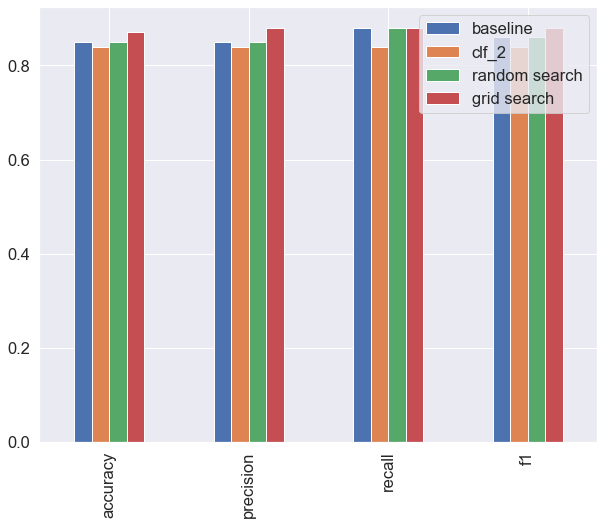

In [105]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics
                                })
compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading Trained Machine Learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [106]:
import pickle

#Save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', "wb"))

In [108]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [109]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.88, 'recall': 0.88, 'f1': 0.88}

**JobLib**

In [110]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [111]:
# Import a save joblib model

loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [112]:
# Make and evaludate joblib prediction
joblib_y_preds = loaded_job_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.88, 'recall': 0.88, 'f1': 0.88}

## 7. Putting it all together

Google: sklearn pipeline

In [123]:
data = pd.read_csv("./data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [124]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [125]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [126]:
# Drop the rows with missing lables (Label = Price in this case)
data.dropna(subset=["Price"], inplace=True)
data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

### Steps:

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

## Sklearn Pipeline

Now we've dropped the rows with no labels and split our data into `X` and `y`, let's create a [`Pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) (or a few of them) to fill the rest of the missing values, encode them if necessary (turn them into numbers) and fit a model to them.

A `Pipeline()` in Scikit-Learn is a class which allows us to put multiple steps, such as filling data and then modelling it, together sequentially.

More specifically, we'll go through the following steps:
1. Define categorical, door and numeric features.
2. Build transformer `Pipeline()`'s for imputing missing data and encoding data.
3. Combine our transformer `Pipeline()`'s with [`ColumnTransformer()`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).
4. Build a `Pipeline()` to preprocess and model our data with the `ColumnTransformer()` and [`RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).
5. Split the data into train and test using `train_test_split()`.
6. Fit the preprocessing and modelling `Pipeline()` on the training data.
7. Score the preprocessing and modelling `Pipeline()` on the test data.


Let's start with steps 1. and 2.

We'll build the following:
* A categorical transformer to fill our categorical values with the value `'missing'` and then one encode them.
* A door transformer to fill the door column missing values with the value `4`.
* A numeric transformer to fill the numeric column missing values with the mean of the rest of the column.

All of these will be done with the `Pipeline()` class.

In [130]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
import numpy as np
np.random.seed(42)



# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")) #transform 
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    # Create door transformer (fills all door missing values with 4)
    ("imputer", SimpleImputer(strategy="constant", fill_value=4)) 
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("numeric", numeric_transformer, numeric_feature)
    ]
)

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),# this will fill our missing data and make sure it's all numbers
    ("model", RandomForestClassifier()) # this will model our data

])

# Split Data
X = data.drop("Price", axis = 1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                      

In [131]:
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [134]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
#Grid of Hyper-parameters will be use in GridSearchCV
pipe_grid = {
    # -- : means up to one level
    #from preprocessor -> numeric_transformer > imputer: adjust strategy
    "preprocessor__numeric__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=au

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
 

In [135]:
gs_model.score(X_test, y_test)

0.3339554263158365

Nice! Our `Pipeline()` steps seem to have worked for the test dataset as well.

There are a few things going on behind the scenes here. The main ones being how the `Pipeline()` class deals with data transformation.

## Pipeline behind the scenes

When filling **numerical data**, it's important **not** to use values from the test set to fill values in the training set. Since we're trying to predict on the test set, this would be like taking information from the future to fill in the past.

Let's have an example.

In our case, the `Odometer (KM)` column is missing values. We could fill every value in the column (before splitting it into train and test) with the `mean()`. But this would result in using information from the test set to fill the training set (because we fill the whole column before the split).

Instead, we split the data into train and test sets first (still with missing values). Then calculate the `mean()` of the `Odometer (KM)` column on the training set and use it to fill the **training set** missing values *as well as* the **test set** missing values. 

Now you might be asking, how does this happen?

Well, behind the scenes, `Pipeline()` calls a couple of methods:
1. `fit_transform()` - in our case, this computes the `mean()` of the `Odometer (KM)` column and then transforms the rest of the column on the **training data**. It also stores the `mean()` in memory.
2. `transform()` - uses the saved `mean()` of the `Odometer (KM)` column and transforms the **test** values.

Wait, wait, wait. This is confusing... how does the `Pipeline()` know what the training and test data are? We never told it?

You're right.

The magic trick is:
* `fit_transform()` is only ever used when calling `fit()` on your `Pipeline()` (in our case, when we used `model.fit(X_train, y_train)`.
* `transform()` is only ever used when calling `score()` or `predict()` on your `Pipeline()` (in our case, `model.score(X_test, y_test)`.

![what's happening with Pipeline](https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/images/sklearn-whats-happening-with-pipeline.png)

This means, when our missing **numerical values** get calculated and filled (using `fit_transform()`), they only happen on the training data (as long as you only pass `X_train` and `y_train` to `model.fit()`).

And since they get saved in memory, when we call `model.score(X_test, y_test)` and subsequently `transform()`, the test data gets preprocessed with information from the training set (using the past to try and predict the future, not the other way round).

### What about categorical values?

Since they usually don't depend on each other, categorical values are okay to be filled across sets and examples.

Okay, knowing all this, let's cross-validate our model pipeline using [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

Since our `model` is an instance of `Pipeline()`, the same steps as we discussed above happen here with the `cross_val_score()`.

## Next steps
If you'd like to dig deeper into what's happening here, I'd suggest the following reading resources and next steps.
- **Reading:** [Scikit-Learn Pipeline() documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).
- **Reading:** [Imputing missing values before building an estimator](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html) (compares different methods of imputing values).
- **Practice:** Try [tuning model hyperparameters with a `Pipeline()` and `GridSearchCV()`](https://scikit-learn.org/stable/modules/grid_search.html#composite-estimators-and-parameter-spaces).